# Permutation Importance

## 1. Basic Idea

The main idea behind permutation importance is to shuffle the value of one feature column and then check the performance of a pretrained network on this permuted dataset. The performance will probably decrease, but the relative drop will indicate how important the feature is. 

Hence, this method is model agnostic.

Further information can be found on https://arxiv.org/pdf/1801.01489.pdf 

## 2. Algorithm

1. Take a model that was fit to the training set
2. Estimate the predicted performance of the model on a validation dataset and take that as the baseline performance
3. For each feature j:
  
  a. Shuffle all the values of the column in the original dataset (the other columns and labels are fixed)

  b. Record the performance of the shuffeled dataset on the original network 

  c. Compute the feature importance as the absolute difference between the baseline performance and the performance of the shuffeled dataset.

Repeat a - c for a large number of times and average over all trials.

## 3. Permutation Importance applied to a stroke dataset using a Random Forest

In [ ]:
#Cell needs to be executed once 
!pip uninstall matplotlib
!pip install matplotlib

In [ ]:
! git clone https://gist.github.com/aishwarya8615/d2107f828d3f904839cbcb7eaa85bd04 'stroke'

fatal: destination path 'stroke' already exists and is not an empty directory.


Preparing the dataset to feed it into a Random Forest Classifier.

In [ ]:
#Read data
import sys 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tabulate import tabulate

data = pd.read_csv('/content/stroke/healthcare-dataset-stroke-data.csv')

#Print the data
print(f'We have {len(data)} datapoints. The first ten data points are:')
print(data.iloc[0:10,:].to_markdown()) 

# BMI-value often is NaN, so we need to replace it with 0
data.bmi = data.bmi.fillna(0)

# Replace String values by introducing dummys
data_with_dummys = pd.get_dummies(data)

# Delete the id-column because it's not important for us
data_with_dummys.drop(["id"], axis=1, inplace=True)

# Split the data into train and test
test_split = 0.2

train, test = train_test_split(data_with_dummys, test_size=test_split)
train_x, train_y  =  train.iloc[:, train.columns != 'stroke'], train.iloc[:, train.columns == 'stroke']
test_x, test_y   =  test.iloc[:, test.columns != 'stroke'], test.iloc[:, train.columns == 'stroke']

# Oversample the dataset to have more datapoints with the labels that have been rare in the original dataset
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

# Convert from pandas dataframe to numpy and oversample
np_x = train_x.to_numpy()
np_y = train_y.to_numpy()
np_x, np_y = oversample.fit_resample(np_x, np_y)

# Convert from numpy back to pandas dataframe
over_x = pd.DataFrame(np_x, columns=train_x.columns)
over_y = pd.Series(np_y, name="ytrain")

We have 5110 datapoints. The first ten data points are:
|    |    id | gender   |   age |   hypertension |   heart_disease | ever_married   | work_type     | Residence_type   |   avg_glucose_level |   bmi | smoking_status   |   stroke |
|---:|------:|:---------|------:|---------------:|----------------:|:---------------|:--------------|:-----------------|--------------------:|------:|:-----------------|---------:|
|  0 |  9046 | Male     |    67 |              0 |               1 | Yes            | Private       | Urban            |              228.69 |  36.6 | formerly smoked  |        1 |
|  1 | 51676 | Female   |    61 |              0 |               0 | Yes            | Self-employed | Rural            |              202.21 | nan   | never smoked     |        1 |
|  2 | 31112 | Male     |    80 |              0 |               1 | Yes            | Private       | Rural            |              105.92 |  32.5 | never smoked     |        1 |
|  3 | 60182 | Female   |    49 |      

Create the Random Forest classifier and train it.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(over_x, over_y)
y_pred = rf.predict(test_x)

print(f"The classifier is trained has an accuracy of {accuracy_score(test_y, y_pred)}.")
baseline_performance = accuracy_score(test_y, y_pred)

The classifier is trained has an accuracy of 0.949119373776908.


Now we apply permutation importance.

In [ ]:
import numpy as np

runs_per_feature = 50

feature_and_importance = {}

# Iterate over all features
for fx, feature in enumerate(test_x): 

  ################### IMPLEMENTATION ###################

Finally we may want to plot the results.

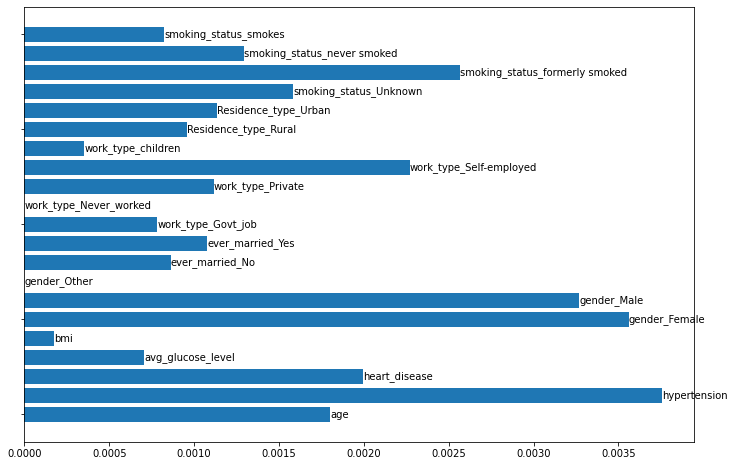

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[12, 8])
bars = ax.barh(np.arange(len(feature_and_importance)), feature_and_importance.values())

ax.bar_label(bars, labels=feature_and_importance.keys())
ax.set_yticklabels([])
plt.show()

## 4. Exercises

Answer the following questions:

1. What happens if we increase the number of `runs_per_feature`? What happens if we decrease it? Explain your reasoning.
2. If we train a new Random Forest classifier, will the plot differ a lot? What does this say about the quality of our classifier?
3. What changes if we just set one feature to zero instead of shuffeling the values?
4. What happens if we use the same method for a neural network? Please check the code below:

In [ ]:
from tensorflow import keras 
import tensorflow as tf 
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, recall_score ,precision_score, f1_score
from google.colab import drive
drive.mount('/content/drive')

nn = keras.models.load_model('/content/drive/MyDrive/XAI workshop/Networks')

#Compute the baseline performance
y_pred = nn.predict(test_x)

print(f"The classifier is trained has an accuracy of {accuracy_score(test_y, np.round(abs(y_pred)), normalize=True) }.")
baseline_performance = accuracy_score(test_y, np.round(abs(y_pred)), normalize=True)


Model: "stroke_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 21)]              0         
                                                                 
 dense_44 (Dense)            (None, 100)               2200      
                                                                 
 dropout_33 (Dropout)        (None, 100)               0         
                                                                 
 dense_45 (Dense)            (None, 1000)              101000    
                                                                 
 dropout_34 (Dropout)        (None, 1000)              0         
                                                                 
 dense_46 (Dense)            (None, 100)               100100    
                                                                 
 dropout_35 (Dropout)        (None, 100)            

Again we implement permutation importance for the trained network.

In [ ]:
runs_per_feature = 50

feature_and_importance = {}

  ################### IMPLEMENTATION ###################

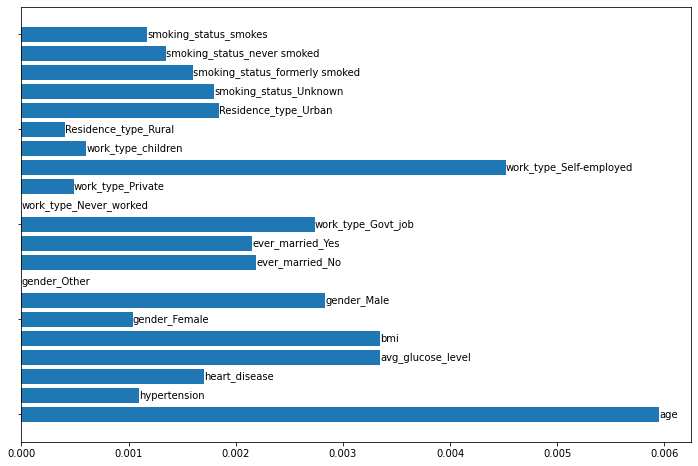

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[12, 8])
bars = ax.barh(np.arange(len(feature_and_importance)), feature_and_importance.values())

ax.bar_label(bars, labels=feature_and_importance.keys())
ax.set_yticklabels([])
plt.show()